**Quick overview of the structure of each dataset:**

Members Dataset:
Contains fields such as memberProfileId, race, gender, language, and age.  

Chronic Conditions Dataset:
Contains fields such as memberProfileId, diseaseSegmentName (the condition name), and the firstDiagnosisDate and lastDiagnosisDate.

Medical Events Dataset:
Contains member_profile_id, event_subtype_name (e.g., PCP Visit), and start_date and end_date of each event.

In [2]:
import pandas as pd

# Loading the members dataset
members_df = pd.read_csv('/content/dp_table_members.csv', delimiter='\t', encoding='ISO-8859-1')

# Loading the chronic conditions dataset with BOM handling and comma delimiter
chronic_conditions_df = pd.read_csv('/content/dp_table_chronic_and_bh.csv', delimiter=',', encoding='utf-8-sig')

# Loading the medical events dataset with BOM handling and comma delimiter
medical_events_df = pd.read_csv('/content/dp_table_medical_events.csv', delimiter=',', encoding='utf-8-sig')

# Displaying the first few rows of each dataset to verify if they are passed correctly
members_df_head = members_df.head()
chronic_conditions_df_head = chronic_conditions_df.head()
medical_events_df_head = medical_events_df.head()

members_df_head, chronic_conditions_df_head, medical_events_df_head


(   memberProfileId                       race  gender  \
 0               39  BLACK OR AFRICAN AMERICAN    MALE   
 1              135                      WHITE    MALE   
 2              155                      WHITE  FEMALE   
 3              192                   HISPANIC    MALE   
 4              218                      WHITE    MALE   
 
                             language  age  
 0  CREOLES AND PIDGINS, FRENCH-BASED    6  
 1                            ENGLISH    2  
 2                            ENGLISH    8  
 3                            ENGLISH    2  
 4                            ENGLISH    2  ,
    memberProfileId                         diseaseSegmentName  \
 0              192                        Congenital disorder   
 1              236                          Anxiety disorders   
 2              262                                     Asthma   
 3              262                        Respiratory disease   
 4              449  Attention-deficit hyperactiv

Now since data is successfully loaded. I am starting with exploring the datasets

**1. Explore the Members Dataset to understand the data:**
The Members Data has demographic information (e.g., age, gender, race, language), that helps in understanding factors influencing ED visits.

 Analyze the distribution of members' age, gender, race, and language to identify any potential patterns related to ED visits.

Chronic Conditions: Check if there are any members with specific chronic conditions that might influence their chance of visiting the ED.

Missing values in members dataset:
memberProfileId    0
race               0
gender             0
language           0
age                0
dtype: int64

Summary statistics for the members dataset:
       memberProfileId           age
count     2.500000e+04  25000.000000
mean      4.568153e+05     27.043880
std       2.804144e+05     19.735961
min       3.900000e+01      0.000000
25%       2.104155e+05     10.000000
50%       4.236450e+05     23.000000
75%       6.486360e+05     40.000000
max       1.320464e+06    101.000000


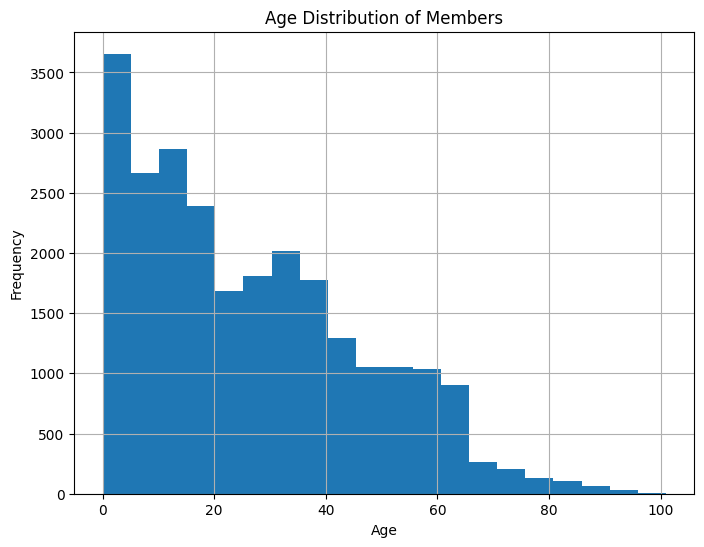

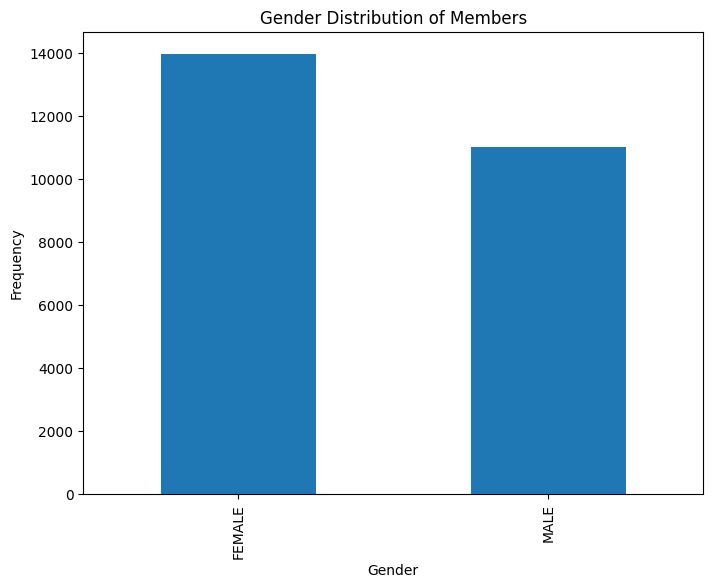


Chronic Conditions by Gender:
gender                                              FEMALE  MALE
diseaseSegmentName                                              
Adrenogenital disorder                                   0     3
Age-related Osteoporosis with current pathological       6     2
Alcoholic liver disease                                 15    12
Alzheimer's disease                                     14    15
Amino acid metabolism diorder                            4     2
...                                                    ...   ...
Spinal disk disorder                                   113    65
Stress reaction                                       1311  1088
Stroke                                                  95    53
Ulcerative colitis                                      14    15
Unspecified psychosis not due to a substance or kn      59    40

[83 rows x 2 columns]


In [3]:

import matplotlib.pyplot as plt

# Checking for missing values in the members dataset
print("Missing values in members dataset:")
print(members_df.isnull().sum())

# Summary statistics for the members dataset (age distribution, etc.)
print("\nSummary statistics for the members dataset:")
print(members_df.describe())

# Plotting the Distribution of age in the members dataset to get better understanding of data
plt.figure(figsize=(8, 6))
members_df['age'].hist(bins=20)
plt.title("Age Distribution of Members")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plotting the Distribution of gender in the members dataset
plt.figure(figsize=(8, 6))
members_df['gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution of Members")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

# Cross-tabulation: chronic conditions by gender
chronic_by_gender = pd.crosstab(chronic_conditions_df['diseaseSegmentName'], members_df['gender'])
print("\nChronic Conditions by Gender:")
print(chronic_by_gender)


**Gender Distribution:** The dataset has more female members than male members, with around 14,000 females and 11,000 males.

**Age Distribution:** The majority of members are very young, with a peak in the 0-5 age group. The number of members decreases as age increases, with less members over 60.
**Overall:** The dataset is skewed towards younger individuals and females, which will influence healthcare and ED utilization patterns.

In [4]:

# Filtering for ED visits (emergency department visits)
ed_visits_df = medical_events_df[medical_events_df['event_subtype_name'] == 'ED Visit']

# Now ed_visits_df contains only the ED visits


gender             FEMALE  MALE
member_profile_id              
39                      0     1
155                     2     0
218                     1     0
262                     1     1
449                     1     0
...                   ...   ...
337749                  2     1
344443                 10     2
346945                  1     0
376830                  0     1
1241286                 2     2

[2023 rows x 2 columns]


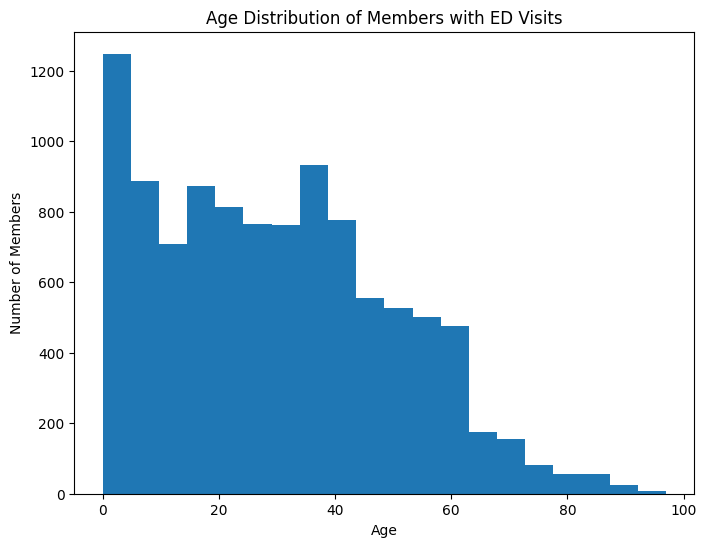

In [5]:
# Cross-tabulation of ED visits by gender
er_visits_by_age_gender = pd.crosstab(ed_visits_df['member_profile_id'], members_df['gender'])
print(er_visits_by_age_gender)

# Visualizatio of Age distribution for members with ED visits
plt.figure(figsize=(8, 6))
plt.hist(members_df[members_df['memberProfileId'].isin(ed_visits_df['member_profile_id'])]['age'], bins=20)
plt.title("Age Distribution of Members with ED Visits")
plt.xlabel("Age")
plt.ylabel("Number of Members")
plt.show()


**From the histogram:** The majority of ED visits are from younger members (ages 0-5), which may be due to childhood illnesses. There is also good number of visits from middle-aged members, but older people have less number of ED visits.

**From the crosstab:**
This data shows how many times each female and male associated with each member_profile_id visited the ED.
Some members have a large number of visits from one gender (e.g., member 344443 with 10 female visits), while others have a balance of visits from both genders (e.g., member 262).
Insights:
The table might also show households or shared profiles where multiple individuals (both male and female) are using the same member profile

**2. Explore the Medical Events Dataset**
It helps focus on the frequency of ED visits and analyze trends. I'll use this data to track ED utilization and define thresholds for Tier 1 (Super Utilizers) and Tier 2 (High Utilizers).

Key Steps that i perform below :
Count ED Visits: Identify how many ED visits each member had and explore the distribution of ED visits across the population.

Trend Analysis: Looking for patterns like multiple ED visits in a short time period.

Outlier Detection: Detecting members with an unusually high number of ED visits.

**Exploring the Medical Events Data:**

1**. Counting ED Visits per Member:**
First, I will count how many times each member visited the emergency department (ED). This will help identify frequent users.





In [6]:
# Filtering for ED visits (assuming 'ED Visit' is the event type for emergency visits)
ed_visits_df = medical_events_df[medical_events_df['event_subtype_name'] == 'ED Visit']

# Counting the number of ED visits per member
ed_visit_counts = ed_visits_df['member_profile_id'].value_counts().reset_index()
ed_visit_counts.columns = ['member_profile_id', 'ed_visit_count']

# Displaying the first few records of ED visit counts
print("\nED Visit Counts per Member:")
print(ed_visit_counts.head())

# Summary statistics for ED visit counts
print("\nSummary of ED Visit Counts:")
print(ed_visit_counts['ed_visit_count'].describe())



ED Visit Counts per Member:
   member_profile_id  ed_visit_count
0             877527             120
1             688823              91
2             681528              87
3             218438              62
4             916603              60

Summary of ED Visit Counts:
count    10382.000000
mean         2.797919
std          3.995639
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        120.000000
Name: ed_visit_count, dtype: float64


**Insights From the above output:**
The average number of ED visits is 2.8, but there are outliers who visit the ED far more frequently (e.g., 120 times).

Eg: The 75th percentile indicates that most members have 3 or fewer visits, but the high standard deviation shows there is a small group of members driving up the average.

**Identifying Members with Multiple Visits Within a Short Time Frame( e.g., 30 Days)**

I can calculate the time between successive ED visits to see if members are frequently visiting the ED within a short time frame (eg: multiple visits within 30 days).

In [9]:
import pandas as pd
import datetime as dt

# Step 1: Ensure the 'start_date' is in datetime format
ed_visits_df['start_date'] = pd.to_datetime(ed_visits_df['start_date'], errors='coerce')

# Step 2: Sort ED visits by 'member_profile_id' and 'start_date'
ed_visits_df = ed_visits_df.sort_values(by=['member_profile_id', 'start_date'])

# Step 3: Calculate time differences between successive visits for each member
ed_visits_df['time_since_last_visit'] = ed_visits_df.groupby('member_profile_id')['start_date'].diff().dt.days

# Step 4: Find members with multiple ED visits within 30 days
multiple_visits_30_days = ed_visits_df[ed_visits_df['time_since_last_visit'] <= 30]

# Step 5: Display the first few members with multiple ED visits in a short period
print("\nMembers with multiple ED visits within 30 days:")
print(multiple_visits_30_days[['member_profile_id', 'start_date', 'time_since_last_visit']].head())



Members with multiple ED visits within 30 days:
      member_profile_id start_date  time_since_last_visit
11                  155 2021-02-03                   12.0
372                 665 2020-02-15                    3.0
1113               6790 2021-05-04                    8.0
1469               6883 2021-04-13                    9.0
1471               6883 2021-08-19                    1.0



Member 155:
Had a visit on 2021-02-03.
The previous ED visit was 12 days prior.

Member 665:
Had a visit on 2020-02-15.
The previous ED visit was only 3 days prior.

Member 6790:
Had a visit on 2021-05-04.
The previous ED visit occurred 8 days earlier.

**Inferences**
These members may be facing chronic health issues or unresolved medical problems, leading to frequent visits within a short period (e.g., 1-12 days).
Member 6883 shows particularly high utilization, with visits just 1 day apart, which could be a sign of serious health concerns requiring attention.

**Insights:**
Care Management: These members could benefit from targeted care management programs to address their recurring health issues and potentially reduce the frequency of ED visits.

**Gaps in Care:** Frequent visits within such short time frames may indicate gaps in the healthcare system, where members are not receiving adequate care outside the emergency department.

I am proceeding with the step of identifying Super Utilizers, which are members with more than 5 ED visits. These members require more care management as they frequently use emergency services.

In [10]:
# Counting the total number of ED visits per member
ed_visit_counts = ed_visits_df['member_profile_id'].value_counts().reset_index()
ed_visit_counts.columns = ['member_profile_id', 'ed_visit_count']

# Identifying Super Utilizers (members with more than 5 ED visits)
super_utilizers = ed_visit_counts[ed_visit_counts['ed_visit_count'] > 5]

# Displaying the first few Super Utilizers
print("\nSuper Utilizers (more than 5 ED visits):")
print(super_utilizers.head())

# Summary statistics for Super Utilizers
print("\nSummary statistics for Super Utilizers:")
print(super_utilizers['ed_visit_count'].describe())



Super Utilizers (more than 5 ED visits):
   member_profile_id  ed_visit_count
0             877527             120
1             688823              91
2             681528              87
3             218438              62
4             916603              60

Summary statistics for Super Utilizers:
count    1068.000000
mean       10.859551
std         8.449693
min         6.000000
25%         6.000000
50%         8.000000
75%        12.000000
max       120.000000
Name: ed_visit_count, dtype: float64


The result shows top 5  Super Utilizers. These top members shown above are extremely high users of emergency services, and the data suggests that they might require special care to manage their health outside of the ED.

**From the summary statistics displayed above:** There are 1,068 members classified as Super Utilizers.The members at the top (like member 877527) are extreme outliers, with 120 ED visits,  indicates very serious or poorly managed health conditions. Most Super Utilizers visit the ED between 6 to 12 times, the average number of visits is very high (about 10.86 times).

**Analyze Demographics of Super Utilizers**


Age Distribution of Super Utilizers:
count    1068.000000
mean       37.015918
std        17.425023
min         0.000000
25%        25.000000
50%        35.000000
75%        49.000000
max        89.000000
Name: age, dtype: float64

Gender Distribution of Super Utilizers:
gender
FEMALE    664
MALE      404
Name: count, dtype: int64

Race Distribution of Super Utilizers:
race
WHITE                                        752
HISPANIC                                     161
BLACK OR AFRICAN AMERICAN                    134
AMERICAN INDIAN OR ALASKA NATIVE              11
ASIAN                                          8
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      2
Name: count, dtype: int64


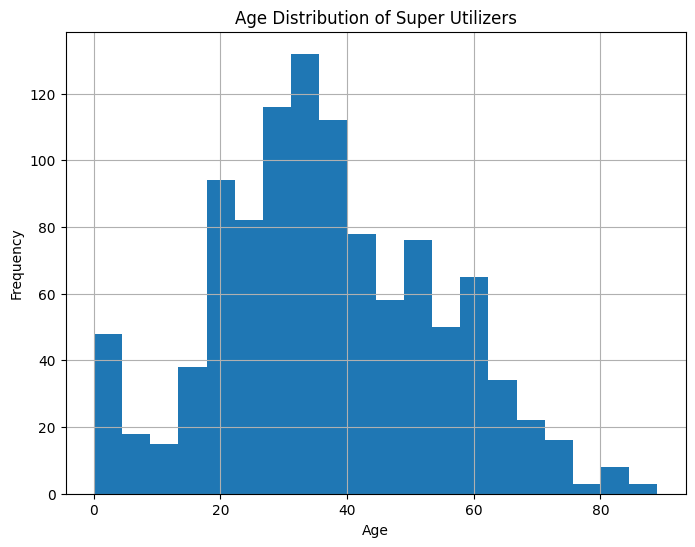

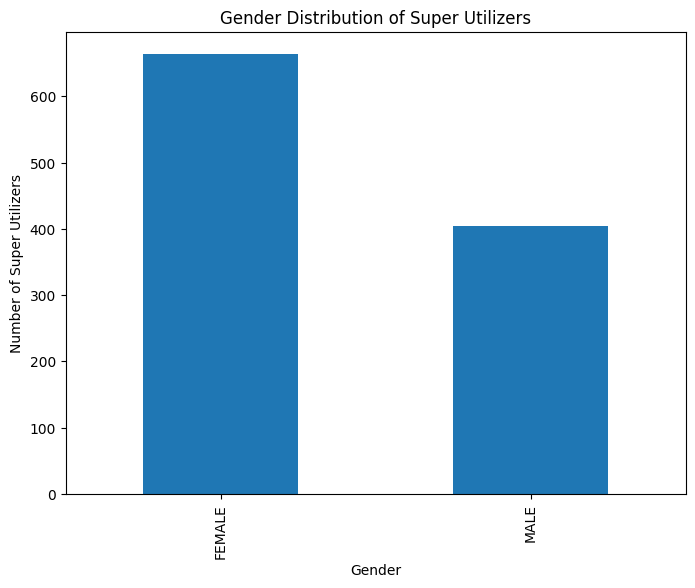

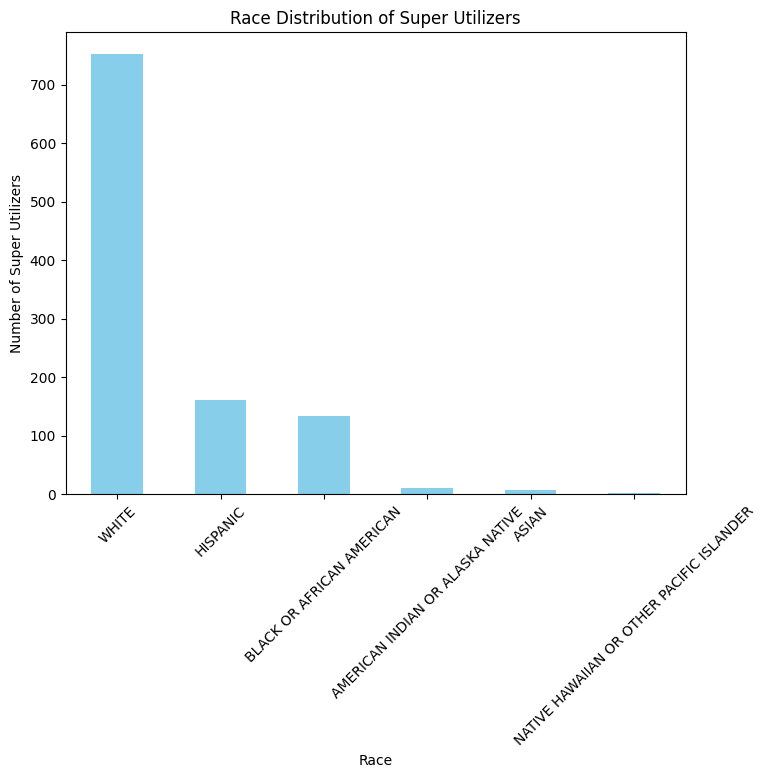

In [11]:
# Merging Super Utilizers with the Members dataset to explore their demographics like age, gender and race
super_utilizers_demographics = super_utilizers.merge(members_df, left_on='member_profile_id', right_on='memberProfileId', how='inner')

# Summary statistics for age
print("\nAge Distribution of Super Utilizers:")
print(super_utilizers_demographics['age'].describe())

# Distribution of gender
gender_distribution = super_utilizers_demographics['gender'].value_counts()
print("\nGender Distribution of Super Utilizers:")
print(gender_distribution)

# exploring the distribution of race
if 'race' in super_utilizers_demographics.columns:
    race_distribution = super_utilizers_demographics['race'].value_counts()
    print("\nRace Distribution of Super Utilizers:")
    print(race_distribution)


import matplotlib.pyplot as plt

# Plotting age distribution
plt.figure(figsize=(8, 6))
super_utilizers_demographics['age'].hist(bins=20)
plt.title("Age Distribution of Super Utilizers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plotting gender distribution
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar')
plt.title("Gender Distribution of Super Utilizers")
plt.xlabel("Gender")
plt.ylabel("Number of Super Utilizers")
plt.show()

# Plotting race distribution
if 'race' in super_utilizers_demographics.columns:
    plt.figure(figsize=(8, 6))
    race_distribution.plot(kind='bar', color='skyblue')
    plt.title("Race Distribution of Super Utilizers")
    plt.xlabel("Race")
    plt.ylabel("Number of Super Utilizers")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


From the graph displayed above, there is a peak around age 40, indicating that this age group has a high concentration of Super Utilizers.

Super Utilizers are spread across different age groups, with frequencies in the 20-50 year age range.


Females are the majority among Super Utilizers, indicating that women are more likely to visit the ED frequently compared to men.


Race distribution:  The majority of Super Utilizers are White (752 members, or about 70%).There are 161 Hispanic members, making up around 15% of the Super Utilizers. 134 members (around 12.5% of Super Utilizers) belong to Black or African American group.

The majority of Super Utilizers are White, followed by Hispanic and Black or African American individuals.

**Analyzing Chronic Conditions of Super Utilizers to get better understanding**


Most Common Chronic Conditions Among Super Utilizers:
diseaseSegmentName
Anxiety disorders           643
Depression                  596
Stress reaction             476
Back Pain                   464
Self Harm                   446
Hypertensive disease        346
Heart disease               327
Asthma                      289
Gastritis and duodenitis    282
Bipolar Disorder            249
Name: count, dtype: int64


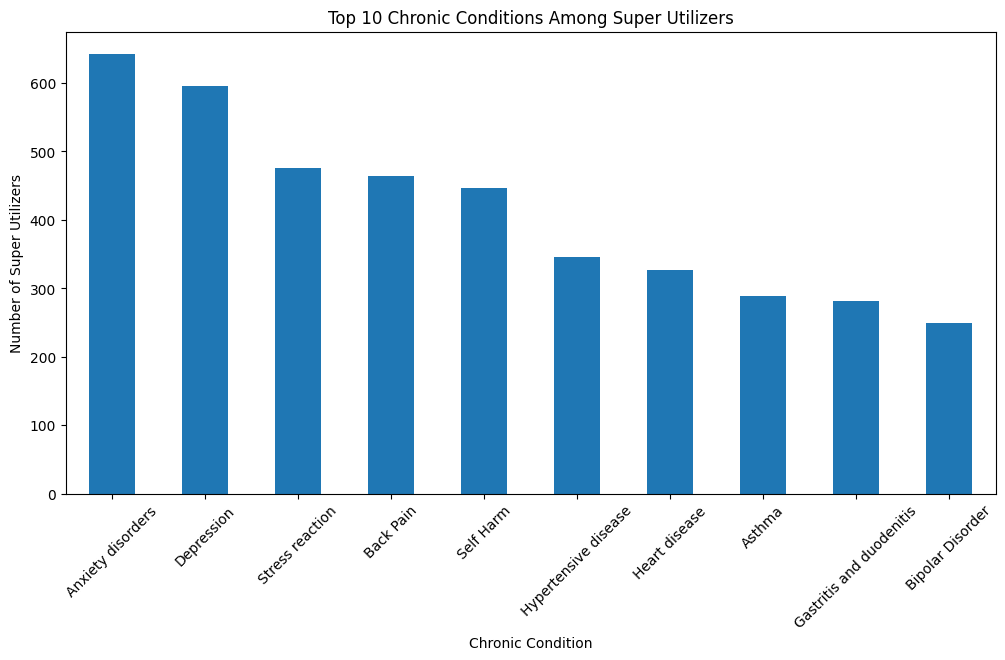

In [12]:
# Merging Super Utilizers with the Chronic Conditions dataset
super_utilizers_conditions = super_utilizers.merge(chronic_conditions_df, left_on='member_profile_id', right_on='memberProfileId', how='inner')

# Counting the number of members with each chronic condition
condition_counts = super_utilizers_conditions['diseaseSegmentName'].value_counts()
print("\nMost Common Chronic Conditions Among Super Utilizers:")
print(condition_counts.head(10))

# Plotting the top 10 chronic conditions among Super Utilizers
plt.figure(figsize=(12, 6))
condition_counts.head(10).plot(kind='bar')
plt.title("Top 10 Chronic Conditions Among Super Utilizers")
plt.xlabel("Chronic Condition")
plt.ylabel("Number of Super Utilizers")
plt.xticks(rotation=45)
plt.show()


The bar chart and the data displays the Top 10 chronic conditions that are prevalent among Super Utilizers, i.e., members who visit the ED more than 5 times.
The bar chart shows top 10 chronic conditions. 643 Super Utilizers suffer from anxiety disorders, making it the most common chronic condition among frequent ED users. 596 Super Utilizers have depression, placing it second on the list. Mental health issues (like anxiety and depression) are significant drivers of frequent ED visits.476 members suffer from stress-related issues, another major contributor to frequent ED visits and so on...


**Key Insights:**
Mental Health: Mental health disorders such as anxiety, depression, and bipolar disorder are  the top conditions forfrequent ED usage.

**Physical Health:** Chronic physical health conditions like back pain, heart disease, and asthma are also major factors for frequent ED visits.


**Self-Harm and Stress:** The high number of members dealing with self-harm and stress-related conditions points to a  need for mental health interventions.

In [14]:
# Check column names in the dataset
print(ed_visits_df.columns)


Index(['member_profile_id', 'event_subtype_name', 'start_date', 'end_date',
       'time_since_last_visit'],
      dtype='object')


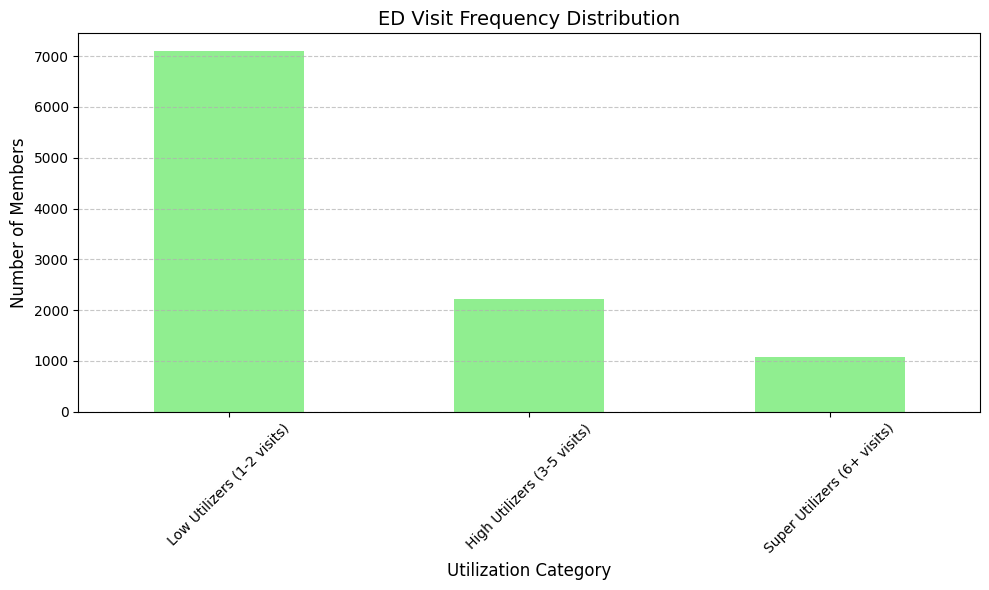

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by 'member_profile_id' and counting ED visits per member
ed_visit_counts = ed_visits_df.groupby('member_profile_id').size()

# Categorizing based on the number of ED visits
ed_visit_frequency = pd.cut(ed_visit_counts, bins=[0, 2, 5, ed_visit_counts.max()],
                            labels=['Low Utilizers (1-2 visits)', 'High Utilizers (3-5 visits)', 'Super Utilizers (6+ visits)'])

# Counting how many members fall into each category
ed_visit_category_counts = ed_visit_frequency.value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ed_visit_category_counts.plot(kind='bar', color='lightgreen')

# Add title and labels
plt.title("ED Visit Frequency Distribution", fontsize=14)
plt.xlabel("Utilization Category", fontsize=12)
plt.ylabel("Number of Members", fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add gridlines to the y-axis for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


**3.  Explore the chronic conditions dataset**

Checking for Missing Values and Data Types

In [18]:
# Checking for missing values
print("\nMissing values in chronic conditions dataset:")
print(chronic_conditions_df.isnull().sum())

# Data types of the columns
print("\nData types of the chronic conditions dataset:")
print(chronic_conditions_df.dtypes)



Missing values in chronic conditions dataset:
memberProfileId       0
diseaseSegmentName    0
firstDiagnosisDate    0
lastDiagnosisDate     0
dtype: int64

Data types of the chronic conditions dataset:
memberProfileId        int64
diseaseSegmentName    object
firstDiagnosisDate    object
lastDiagnosisDate     object
dtype: object


The Chronic Conditions Dataset looks clean with no missing values, and i now have a good understanding of the data types:

memberProfileId: Unique identifier for each member (integer).

diseaseSegmentName: The name of the chronic condition (string/object).

firstDiagnosisDate and lastDiagnosisDate: These are currently in object format (string) and will need to be converted to datetime if i want to perform any time-based analysis.

Exploring the Distribution of Chronic Conditions


Frequency of each chronic condition:
diseaseSegmentName
Anxiety disorders                        5208
Depression                               4141
Stress reaction                          3974
Back Pain                                3261
Hypertensive disease                     2847
                                         ... 
Amino acid metabolism diorder              10
Late syphilis                               7
Adrenogenital disorder                      4
Organ Tuberculosis                          1
Congenital iodine-deficiency syndrome       1
Name: count, Length: 83, dtype: int64


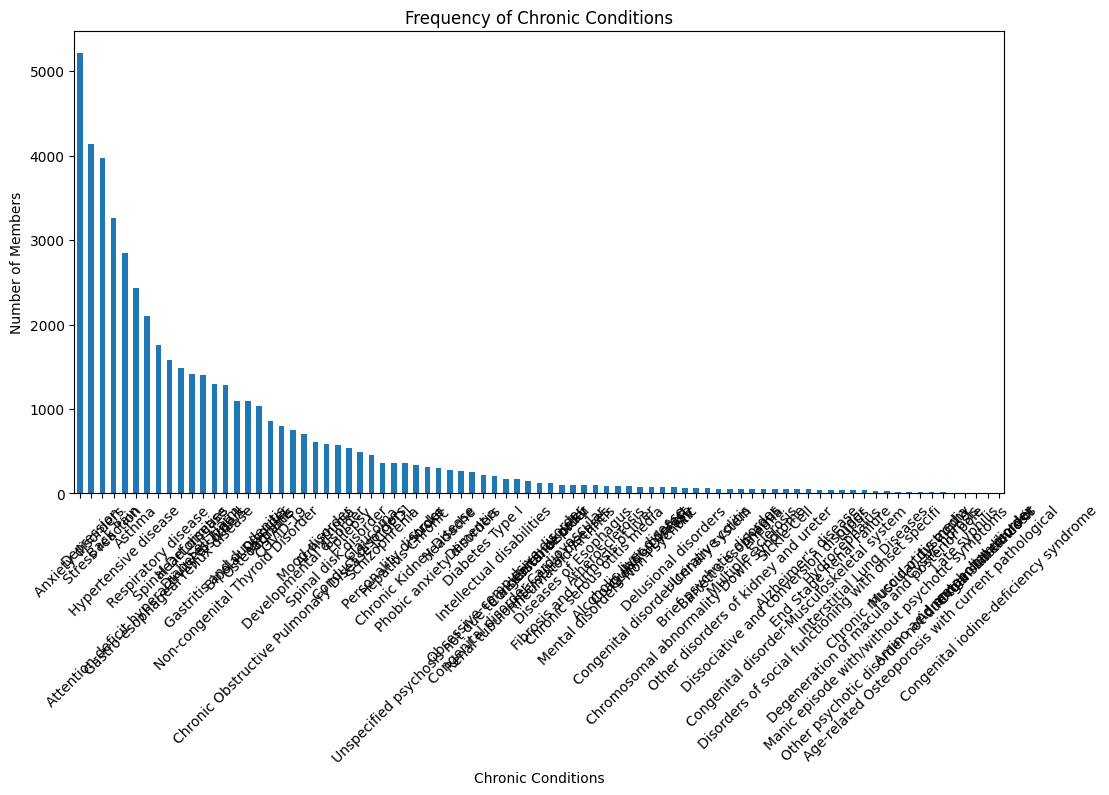

In [19]:
# Counting the number of members with each chronic condition
condition_counts = chronic_conditions_df['diseaseSegmentName'].value_counts()
print("\nFrequency of each chronic condition:")
print(condition_counts)

# Plotting the frequency of chronic conditions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
condition_counts.plot(kind='bar')
plt.title("Frequency of Chronic Conditions")
plt.xlabel("Chronic Conditions")
plt.ylabel("Number of Members")
plt.xticks(rotation=45)
plt.show()




above graph displays the chronic conditions vs members efffected with the chronic condition

Just fetching top 20 chronic conditions


Frequency of each chronic condition:
diseaseSegmentName
Anxiety disorders                        5208
Depression                               4141
Stress reaction                          3974
Back Pain                                3261
Hypertensive disease                     2847
                                         ... 
Amino acid metabolism diorder              10
Late syphilis                               7
Adrenogenital disorder                      4
Organ Tuberculosis                          1
Congenital iodine-deficiency syndrome       1
Name: count, Length: 83, dtype: int64


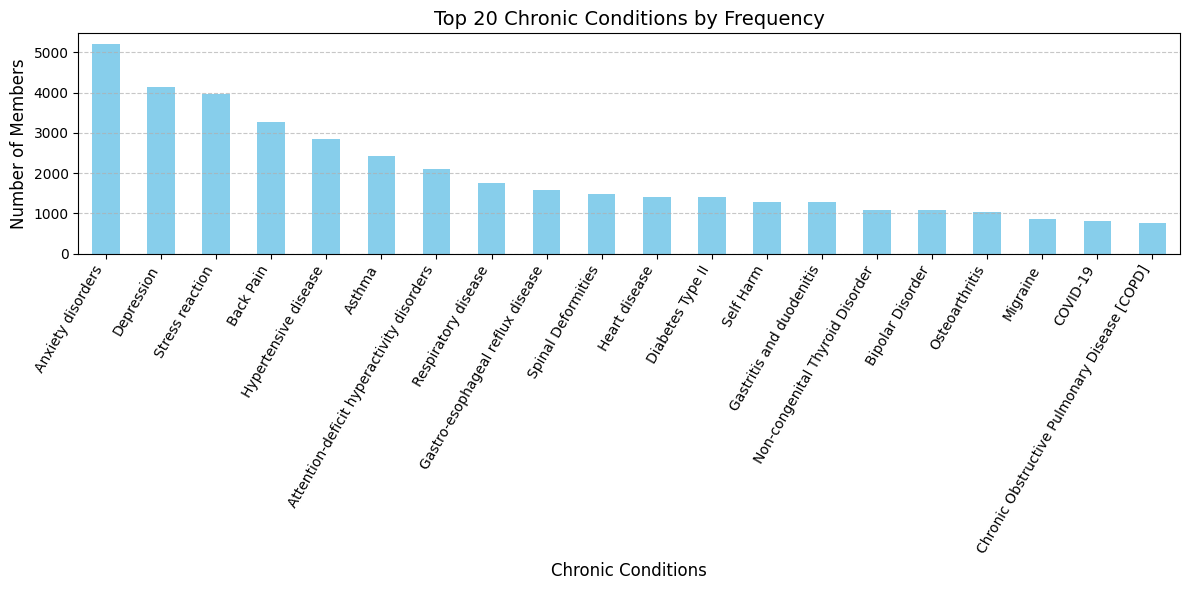

In [20]:
# Counting the number of members with each chronic condition
condition_counts = chronic_conditions_df['diseaseSegmentName'].value_counts()
print("\nFrequency of each chronic condition:")
print(condition_counts)

# Limit to the top 20 conditions for clarity
top_condition_counts = condition_counts.head(20)

# Plotting the frequency of chronic conditions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_condition_counts.plot(kind='bar', color='skyblue')

plt.title("Top 20 Chronic Conditions by Frequency", fontsize=14)
plt.xlabel("Chronic Conditions", fontsize=12)
plt.ylabel("Number of Members", fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


From the above result:

Mental Health Issues (Anxiety, Depression, Stress Reaction) are among the top 3 conditions, affecting a significant portion of the population. This suggests that mental health conditions could be a major driver of healthcare utilization, particularly emergency services.

Physical Conditions like Back Pain and Hypertensive Disease are also prevalent, highlighting the need for better management of chronic physical ailments to prevent emergency care overuse.


Most Common Chronic Conditions are Anxiety Disorders, Depression, Stress Reaction, Back pain, Hypertensive disease.


Less common conditions are Amino acid metabolism disorders, Late syphilis, and Congenital iodine-deficiency syndrome

Linking Chronic Conditions with ED Visits


Chronic conditions linked to frequent ED visits:
diseaseSegmentName
Anxiety disorders                   13181
Depression                          11995
Stress reaction                     10229
Back Pain                            9672
Self Harm                            8055
Hypertensive disease                 7583
Heart disease                        6383
Gastritis and duodenitis             6316
Asthma                               5937
Gastro-esophageal reflux disease     4811
Name: count, dtype: int64


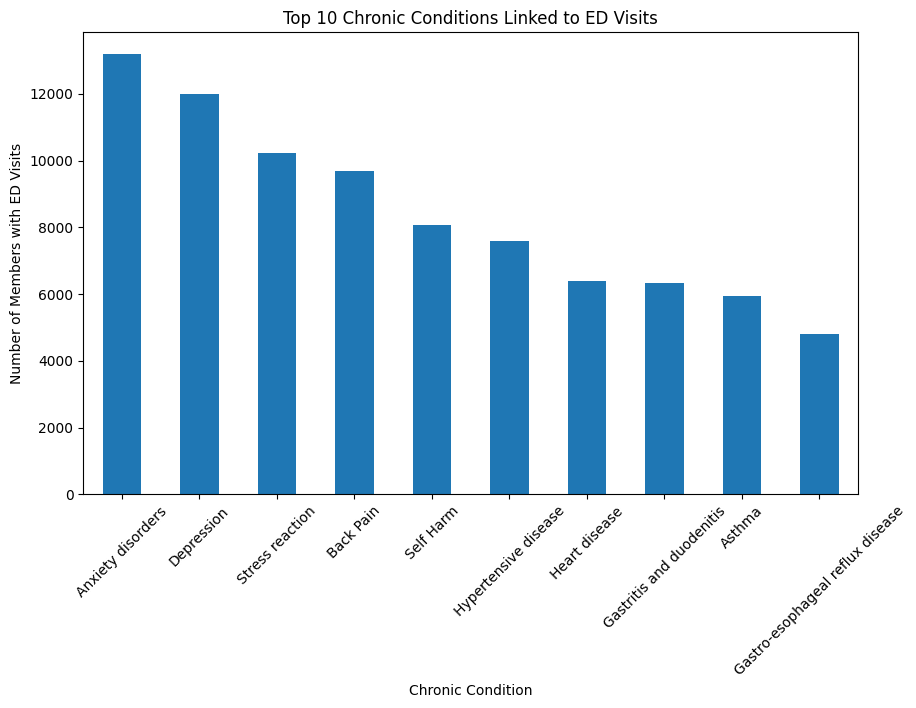

In [21]:
# Rename the column 'member_profile_id' in ed_visits_df to match 'memberProfileId' in chronic_conditions_df
ed_visits_df = ed_visits_df.rename(columns={'member_profile_id': 'memberProfileId'})

# Merging chronic conditions data with ED visit data using the correct column
chronic_conditions_with_ed_visits = chronic_conditions_df.merge(ed_visits_df[['memberProfileId']], on='memberProfileId', how='inner')

# Counting chronic conditions associated with frequent ED visits
chronic_conditions_count = chronic_conditions_with_ed_visits['diseaseSegmentName'].value_counts()

# Displaying the most common chronic conditions linked to ED visits
print("\nChronic conditions linked to frequent ED visits:")
print(chronic_conditions_count.head(10))

# Plot the top 10 chronic conditions linked to ED visits
plt.figure(figsize=(10, 6))
chronic_conditions_count.head(10).plot(kind='bar')
plt.title("Top 10 Chronic Conditions Linked to ED Visits")
plt.xlabel("Chronic Condition")
plt.ylabel("Number of Members with ED Visits")
plt.xticks(rotation=45)
plt.show()



From the above graph:

**Key Insights:**
Mental Health: Anxiety, depression, and stress reactions are significant contributors to frequent ED visits, highlighting the importance of mental health interventions.

**Physical Health:** Chronic physical conditions like back pain, hypertension, and heart disease also lead to frequent ED visits, emphasizing the need for better long-term management.

**Self-Harm: **The large number of ED visits related to self-harm underscores the urgent need for crisis intervention and mental health support services.






---



**Graphs for key questions asked**

**To Visualize Diseases Associated with High ED Utilization**

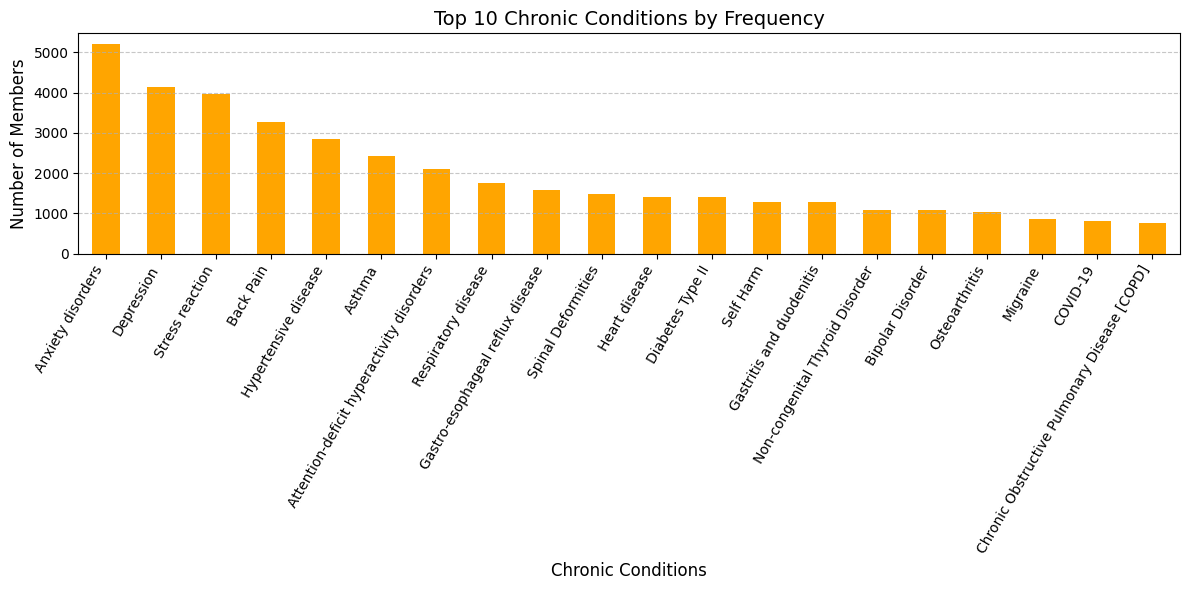

In [22]:
# Plotting top chronic conditions
plt.figure(figsize=(12, 6))
top_condition_counts.plot(kind='bar', color='orange')
plt.title("Top 10 Chronic Conditions by Frequency", fontsize=14)
plt.xlabel("Chronic Conditions", fontsize=12)
plt.ylabel("Number of Members", fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Code for super utilizers and high utilizers**

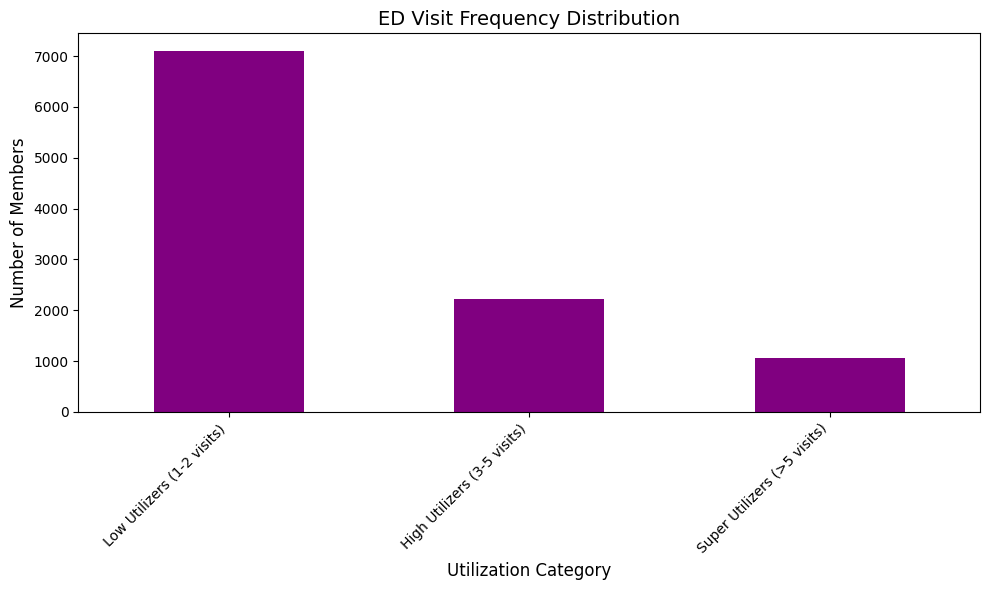

In [23]:
# Correct the categories and ensure Super Utilizers have >5 visits
ed_visit_frequency = pd.cut(ed_visit_counts, bins=[0, 2, 5, ed_visit_counts.max()],
                            labels=['Low Utilizers (1-2 visits)', 'High Utilizers (3-5 visits)', 'Super Utilizers (>5 visits)'])

# Counting the number of members in each category
ed_visit_category_counts = ed_visit_frequency.value_counts()

# Plotting ED visit frequency distribution
plt.figure(figsize=(10, 6))
ed_visit_category_counts.plot(kind='bar', color='purple')
plt.title("ED Visit Frequency Distribution", fontsize=14)
plt.xlabel("Utilization Category", fontsize=12)
plt.ylabel("Number of Members", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [25]:
print(ed_visits_df.columns)


Index(['memberProfileId', 'event_subtype_name', 'start_date', 'end_date',
       'time_since_last_visit'],
      dtype='object')


In [27]:
# Grouping by 'memberProfileId' and counting ED visits per member
ed_visit_counts = ed_visits_df.groupby('memberProfileId').size().reset_index(name='ed_visit_count')

# Merging the count of visits back into the original dataframe
ed_visits_with_counts = ed_visits_df.merge(ed_visit_counts, on='memberProfileId', how='left')

# Filtering for Super Utilizers (more than 5 ED visits)
super_utilizers_df = ed_visit_counts[ed_visit_counts['ed_visit_count'] > 5]

# Filtering for High Utilizers (3 to 5 ED visits)
high_utilizers_df = ed_visit_counts[(ed_visit_counts['ed_visit_count'] >= 3) & (ed_visit_counts['ed_visit_count'] <= 5)]

# Displaying the top Super and High Utilizers
print("\nSuper Utilizers:")
print(super_utilizers_df.head())

print("\nHigh Utilizers:")
print(high_utilizers_df.head())



Super Utilizers:
    memberProfileId  ed_visit_count
25             6883               6
32             6980              13
41             7216               8
44             7304               8
48            11687               6

High Utilizers:
    memberProfileId  ed_visit_count
6               474               3
15              778               3
18             6681               3
35             7050               3
46             7404               5


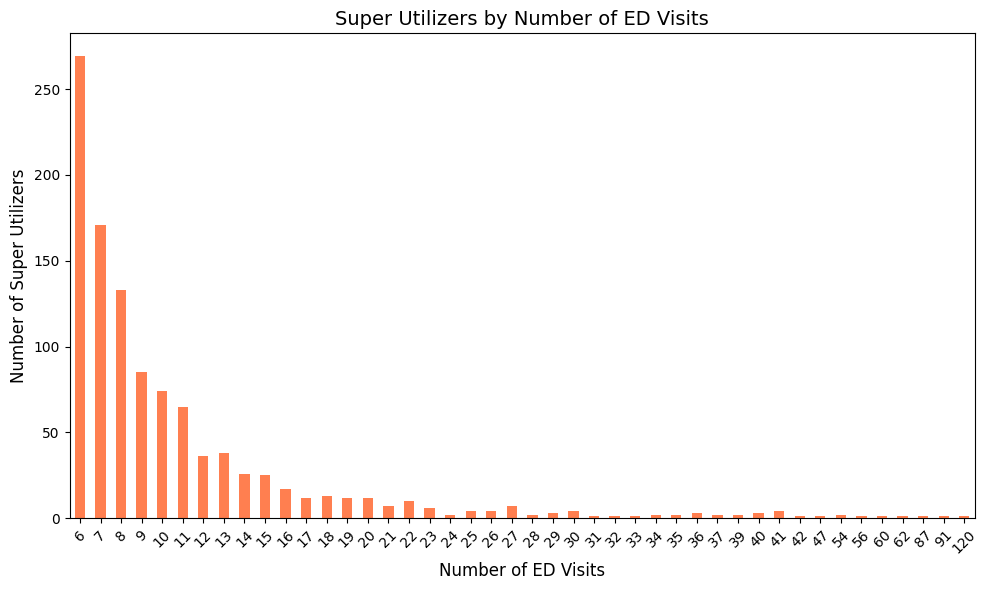

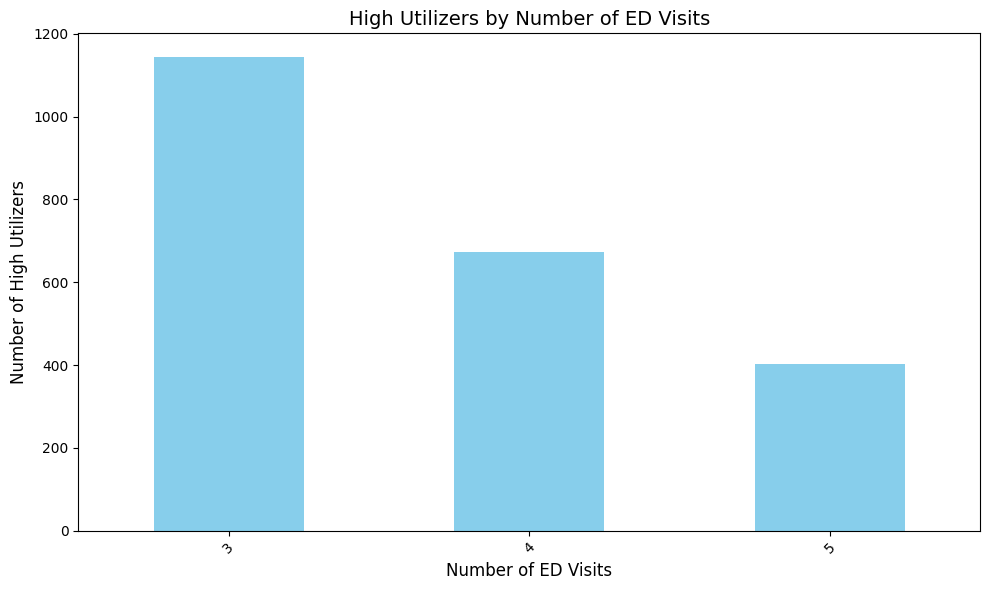

In [ ]:
# Aggregating Super Utilizers by count of ED visits
super_utilizers_summary = super_utilizers_df.groupby('ed_visit_count').size()

# Plotting the Super Utilizers summary
plt.figure(figsize=(10, 6))
super_utilizers_summary.plot(kind='bar', color='coral')
plt.title("Super Utilizers by Number of ED Visits", fontsize=14)
plt.xlabel("Number of ED Visits", fontsize=12)
plt.ylabel("Number of Super Utilizers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Similarly for High Utilizers
high_utilizers_summary = high_utilizers_df.groupby('ed_visit_count').size()

plt.figure(figsize=(10, 6))
high_utilizers_summary.plot(kind='bar', color='skyblue')
plt.title("High Utilizers by Number of ED Visits", fontsize=14)
plt.xlabel("Number of ED Visits", fontsize=12)
plt.ylabel("Number of High Utilizers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
